This notebook makes some plots I found handy for my presentations

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from matplotlib import cm
from root_pandas import read_root
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
import ROOT
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
from scipy.stats import chi2
from scipy import interpolate
import pandas as pd
import math
import matplotlib.colors as colors

Welcome to JupyROOT 6.16/00


In [2]:
def calcChi2Simple(exp,obs):
    chi2tot = 0
    for idx in range(obs.shape[0]):
        if exp[idx] !=0:
            chi2tot += ((obs[idx]-exp[idx])*(obs[idx]-exp[idx]))/exp[idx]
    return chi2tot

def getBinCL(vals,bins,cl):
    sum = 0
    tot = np.sum(vals)
    for idx in range(len(bins)):
        sum += vals[idx]
        if sum > cl*tot:
            return bins[idx]
    assert 1==2

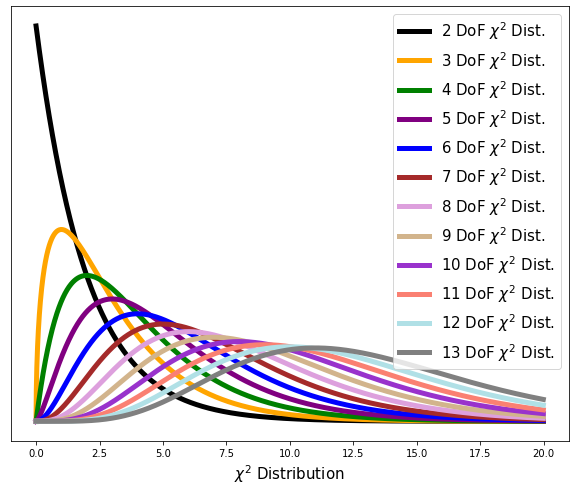

In [3]:
hbins =[i*.01 for i in range(2000)]
fig,ax = plt.subplots(figsize=(10,8))
clr = ['gray','black','orange','green','purple','blue','brown','plum','tan','darkorchid','salmon','powderblue']
ndf=[i+2 for i in range(len(clr))]
for df in ndf:
    ndf_chidist = chi2.pdf(hbins, df=df)
    ndf_chidist = (1000./np.sum(ndf_chidist))*ndf_chidist
    plt.plot(hbins, ndf_chidist,linewidth=5,color=clr[(df-1)%len(clr)],label=str(df)+' DoF '+r'$\chi^2$ Dist.')

# plt.xlabel(r'$\Delta\chi^2$ Distribution',fontsize=15)
plt.xlabel(r'$\chi^2$ Distribution',fontsize=15)
ax = plt.gca()
ax.axes.yaxis.set_visible(False) 
ax.legend(fontsize=15)

plt.show()

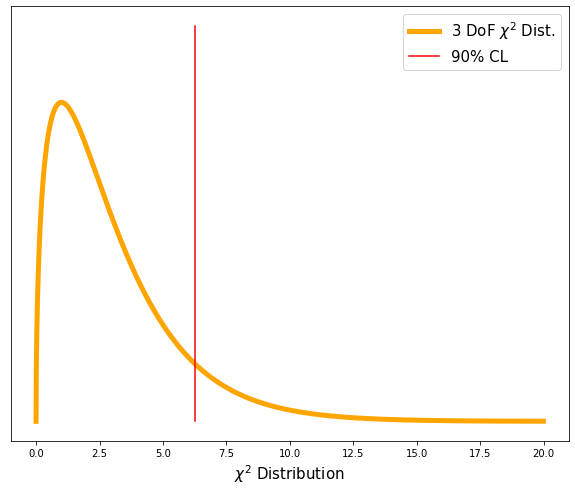

In [4]:
hbins =[i*.01 for i in range(2000)]
fig,ax = plt.subplots(figsize=(10,8))
clr = ['orange']
ndf=[3]
for df in ndf:
    ndf_chidist = chi2.pdf(hbins, df=df)
    ndf_chidist = (1000./np.sum(ndf_chidist))*ndf_chidist
    plt.plot(hbins, ndf_chidist,linewidth=5,color=clr[(df-1)%len(clr)],label=str(df)+' DoF '+r'$\chi^2$ Dist.')

# plt.xlabel(r'$\Delta\chi^2$ Distribution',fontsize=15)
plt.xlabel(r'$\chi^2$ Distribution',fontsize=15)
plt.plot([6.25,6.25],[0,3],color='red',label="90% CL")
ax = plt.gca()
ax.axes.yaxis.set_visible(False) 
ax.legend(fontsize=15)

plt.show()

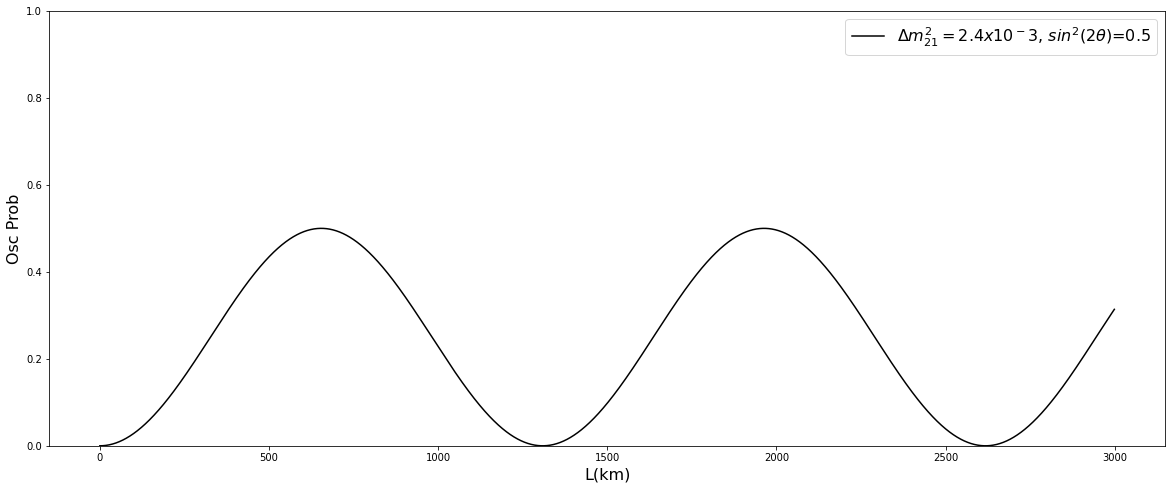

In [5]:
# 2 flavor oscillation
E = 1
deltam =.0024
sin2theta =0.5

pts=[i for i in range(3000)]
osc=[]
for i in pts:
    osc.append(sin2theta*math.sin(float(deltam*i)/float(E))*math.sin(float(deltam*i)/float(E)))

fig,ax = plt.subplots(figsize=(20,8))
plt.plot(pts,osc,color='black',label=r'$\Delta m^2_{21}=2.4x10^-3$, $sin^2(2\theta)$=0.5')
plt.legend(fontsize=16)
plt.xlabel('L(km)',fontsize=16)
ax.set_ylim(0,1)
plt.ylabel('Osc Prob',fontsize=16)
plt.show()
plt.close()

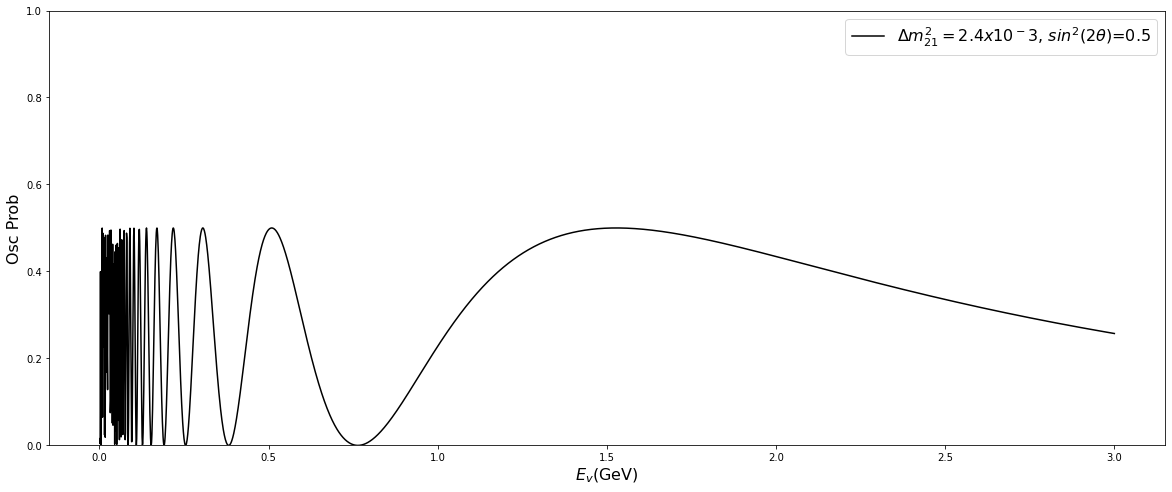

In [6]:
# 2 flavor oscillation
L = 1000
deltam =.0024
sin2theta =0.5

pts=[i*0.001+0.001 for i in range(3000)]
osc=[]
for i in pts:
    osc.append(sin2theta*math.sin(float(deltam*L)/float(i))*math.sin(float(deltam*L)/float(i)))

fig,ax = plt.subplots(figsize=(20,8))
plt.plot(pts,osc,color='black',label=r'$\Delta m^2_{21}=2.4x10^-3$, $sin^2(2\theta)$=0.5')
plt.legend(fontsize=16)
plt.xlabel('$E_{v}$(GeV)',fontsize=16)
ax.set_ylim(0,1)
plt.ylabel('Osc Prob',fontsize=16)
plt.show()
plt.close()

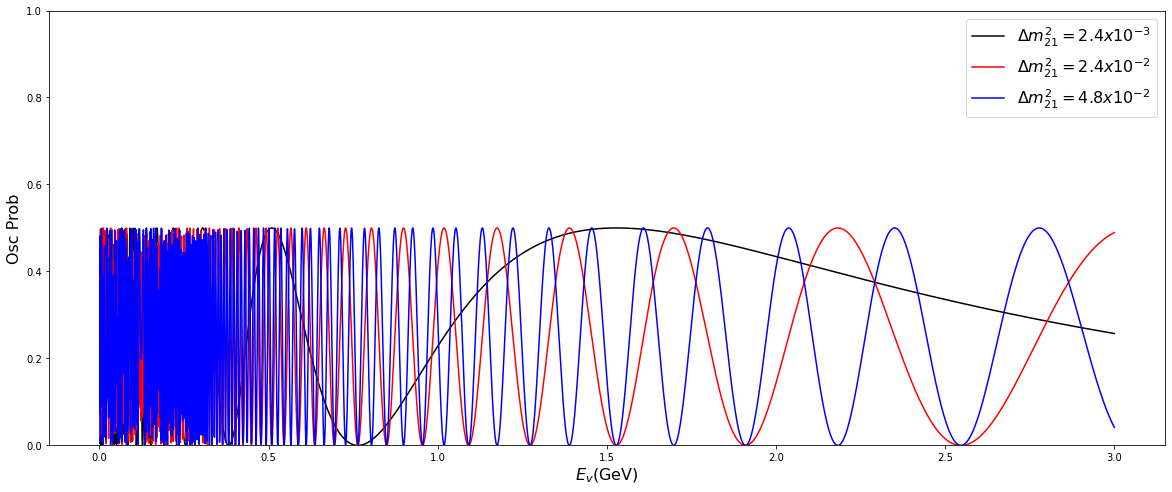

In [7]:
# 2 flavor oscillation
L = 1000
deltam =[.0024,.024,0.048]
colors=['black','red','blue']
labels =[ r'$\Delta m^2_{21}=2.4x10^{-3}$', r'$\Delta m^2_{21}=2.4x10^{-2}$',r'$\Delta m^2_{21}=4.8x10^{-2}$' ]
sin2theta =0.5

fig,ax = plt.subplots(figsize=(20,8))
for m in range(len(deltam)):
    pts=[i*0.001+0.001 for i in range(3000)]
    osc=[]
    for i in pts:
        osc.append(sin2theta*math.sin(float(deltam[m]*L)/float(i))*math.sin(float(deltam[m]*L)/float(i)))
    plt.plot(pts,osc,color=colors[m],label=labels[m])

plt.legend(fontsize=16)
plt.xlabel('$E_{v}$(GeV)',fontsize=16)
ax.set_ylim(0,1)
plt.ylabel('Osc Prob',fontsize=16)
plt.show()
plt.close()

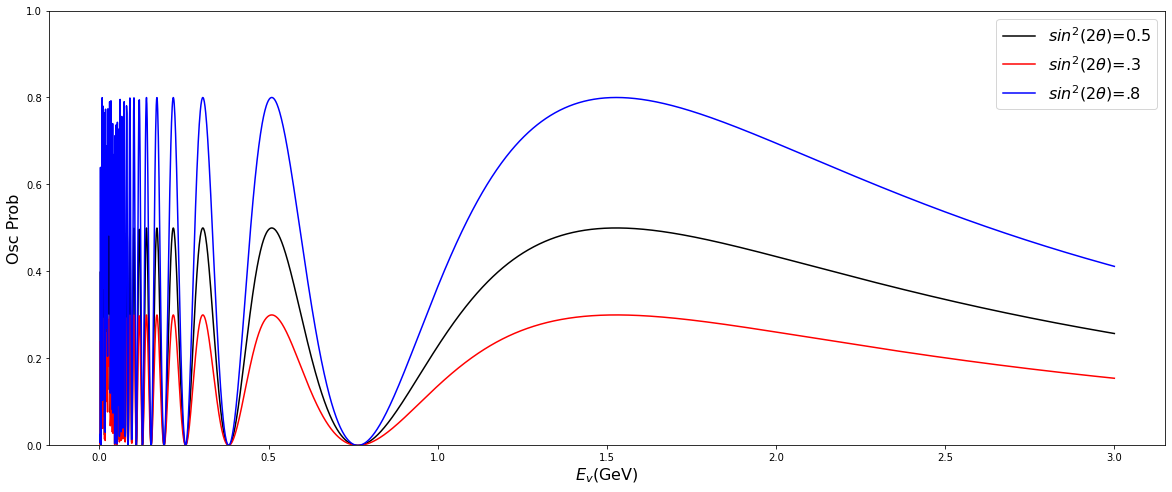

In [8]:
# 2 flavor oscillation
L = 1000
deltam =0.0024
colors=['black','red','blue']
labels =[ r'$sin^2(2\theta)$=0.5', r'$sin^2(2\theta)$=.3',r'$sin^2(2\theta)$=.8']
sin2theta =[0.5,0.3,0.8]

fig,ax = plt.subplots(figsize=(20,8))
for m in range(len(sin2theta)):
    pts=[i*0.001+0.001 for i in range(3000)]
    osc=[]
    for i in pts:
        osc.append(sin2theta[m]*math.sin(float(deltam*L)/float(i))*math.sin(float(deltam*L)/float(i)))
    plt.plot(pts,osc,color=colors[m],label=labels[m])

plt.legend(fontsize=16)
plt.xlabel('$E_{v}$(GeV)',fontsize=16)
ax.set_ylim(0,1)
plt.ylabel('Osc Prob',fontsize=16)
plt.show()
plt.close()